In [1]:
import pandas as pd
from datetime import datetime
from zoe import cases, query, pickle, find_previous, plot_study, plot_study_evolution

In [2]:
uk_active_cases = query("SELECT * FROM uk_active_cases", index='date')
uk_active_cases.index = pd.to_datetime(uk_active_cases.index, format='%Y%m%d')
uk_active_cases

,cartodb_id,the_geom,the_geom_webmercator,corrected_covid_positive
date,,,,
2020-06-12,43130,None,None,85786.972914
2020-06-13,43131,None,None,79691.832736
2020-06-14,43132,None,None,74038.599629
2020-06-15,43133,None,None,68713.510059
2020-06-16,43134,None,None,63969.700500
...,...,...,...,...
2021-03-27,43418,None,None,70186.840159
2021-03-28,43419,None,None,69469.311173
2021-03-29,43420,None,None,68462.096962


In [3]:
curr_date = uk_active_cases.index.max()
print(pickle(uk_active_cases, 'uk_active_cases', curr_date))

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-03-31_2021-03-31-16-26.pickle


In [4]:
prev_date, prev_uk_active_cases = find_previous(curr_date)

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-03-30_2021-03-30-16-45.pickle


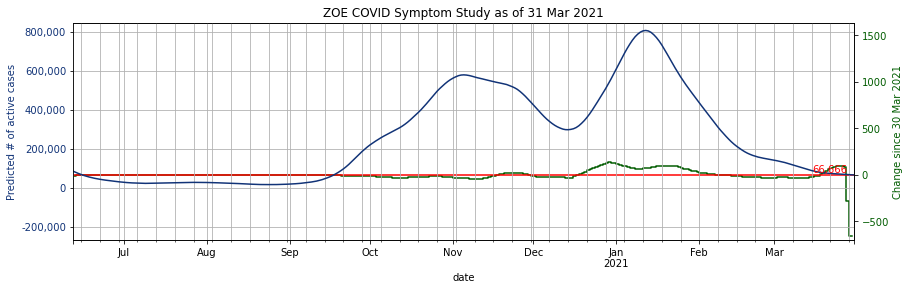

In [5]:
plot_study(curr_date, prev_date, uk_active_cases, prev_uk_active_cases)

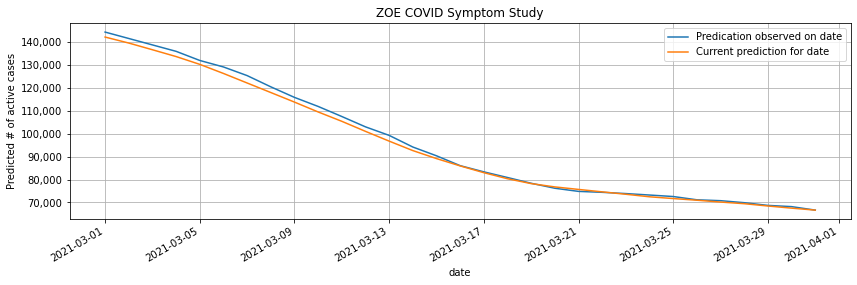

In [6]:
plot_study_evolution(curr_date, days=30)

In [7]:
prevalence_map = query("SELECT * FROM prevalence_map")
prevalence_map['percentage'] = prevalence_map['percentage'].astype(float)

In [8]:
for_date, = prevalence_map['data_status'].unique()
print(pickle(prevalence_map, 'prevalence_map', datetime.strptime(for_date, '%H:%M:%S %d-%m-%Y')))

/Users/chris/coronavirus/data/zoe_prevalence_map_2021-03-31_2021-03-31-16-26.pickle


In [9]:
prevalence_map[['lad16nm', 'lad16cd', 'percentage']].sort_values('percentage', ascending=False)[:10]

,lad16nm,lad16cd,percentage
323,North Lanarkshire,S12000044,1.385168
358,Belfast,N09000003,1.064999
328,Conwy,W06000003,0.530214
245,Rugby,E07000220,0.492308
153,North West Leicestershire,E07000134,0.487257
25,Leicester,E06000016,0.484550
317,Renfrewshire,S12000038,0.466190
17,North East Lincolnshire,E06000012,0.432742
256,Bromsgrove,E07000234,0.355255
150,Dover,E07000108,0.351160
